In [215]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import io
from math import atan

In [216]:
# Declare constants
A = 0.057
ao = -0.698
Cda = 0.69
Cdo = 0.18
Cla = 3.09
Cld = 0.13

#Cda = 0.69
#Cdo = 0.18
#Cla = 1.91
#Cld = 0.33

g = 9.81
m = 0.175
P = 1.23
theta = 0

# Declare step size
h = 0.01

# Declare arrays
xplot = []
yplot = []
tplot = []

In [217]:
# Declare initial conditions
x = 0.0
y = 1.0
u = 0.0
w = 0.0
up = 0
wp = 14
t = 0

In [218]:
while (y > 0):
    
    # Add x,y and t values to respective arrays
    xplot.append(x)
    yplot.append(y)
    t += h
    tplot.append(t)
    
    # Euler Method: Assume y and x are approximately the previous value summed with the respective slope multiplied by change in time
    y = y + (h*up)
    x = x + (h*wp)
    
    # Update new velocity in the y values (u) and velocity in the x values (w)
    u = up + h * ((A*P/(2*m)) * ((wp)**2 + (up)**2) * (Cld + Cla * (theta + np.arctan(-up/wp))) * np.sin(np.pi/2 + np.arctan(-up/wp)) + (A*P/(2*m)) * ((wp)**2 + (up)**2) * (Cdo + Cda * ((theta + np.arctan(-up/wp) - ao)**2)) * np.sin(np.pi+ np.arctan(-up/wp)) - m * g )
    w = wp + h * ((A*P/(2*m)) * ((wp)**2 + (up)**2) * (Cld + Cla * (theta + np.arctan(-up/wp))) * np.cos(np.pi/2 + np.arctan(-up/wp)) + (A*P/(2*m)) * ((wp)**2 + (up)**2) * (Cdo + Cda * ((theta + np.arctan(-up/wp) - ao)**2)) * np.cos(np.pi - np.arctan(-up/wp)))
    up = u
    wp = w
    
    print(str(x) + " " + str(y) + " " + str(t))

0.14 1.0 0.01
0.2779734310089184 1.0003387258 0.02
0.4139886813615056 1.0009773916536213 0.03
0.5481097769734637 1.0018812818989735 0.04
0.680396818021621 1.0030192822318404 0.05
0.8109063573565147 1.0043634708806983 0.060000000000000005
0.9396917299677712 1.0058887611836753 0.07
1.066803341133085 1.0075725884058453 0.08
1.192288919529087 1.0093946347399243 0.09
1.3161937404941364 1.0113365873496374 0.09999999999999999
1.4385608237531473 1.0133819250782434 0.10999999999999999
1.5594311091997095 1.0155157300831161 0.11999999999999998
1.6788436137473672 1.0177245211933275 0.12999999999999998
1.796835571783712 1.0199961062388865 0.13999999999999999
1.9134425613672867 1.0223194509822042 0.15
2.0286986179819047 1.0246845626062777 0.16
2.1426363373929367 1.027082385989637 0.17
2.255286968925153 1.0295047112331557 0.18000000000000002
2.366680500293546 1.0319440911048674 0.19000000000000003
2.4768457349606576 1.0343937672413195 0.20000000000000004
2.5858103628609164 1.0368476040921542 0.210000

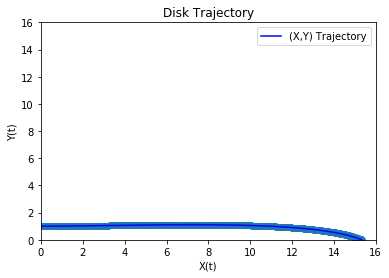

In [219]:
# Plot trajectory (x,y) graph
plt.scatter(xplot, yplot, marker=None)
plt.plot(xplot, yplot, color = 'blue', label = '(X,Y) Trajectory')

plt.ylabel('Y(t)')
plt.ylim(0, 16)
plt.xlim(0, 16)
plt.xlabel('X(t)')
plt.title('Disk Trajectory')
plt.legend()
plt.show()

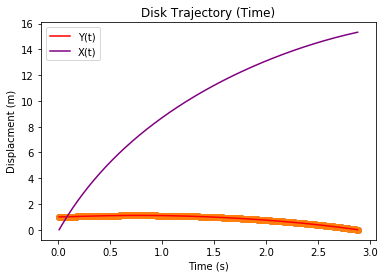

In [220]:
# Plot trajectory X and Y in terms of time
plt.scatter(tplot, yplot)
plt.plot(tplot, yplot, color = 'red', label='Y(t)')

plt.scatter(tplot, yplot)
plt.plot(tplot, xplot, color = 'purple', label='X(t)')

plt.ylabel('Displacment (m)')
plt.xlabel('Time (s)')
plt.title('Disk Trajectory (Time)')
plt.legend()
plt.show()